# Import Library & Read Dataset

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [3]:
#Read DataFrame
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

## Feature Engineering

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


## df info

In [6]:
#Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
#Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

## Numeric Approach

### Describe Data

In [8]:
#Sampling
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,weight_status
582,39,male,45.430,2,no,southeast,6356.27070,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
423,25,male,30.590,0,no,northeast,2727.39510,obese
789,62,female,29.920,0,no,southeast,13457.96080,overweight
1186,20,male,35.625,3,yes,northwest,37465.34375,obese
1255,42,female,37.900,0,no,southwest,6474.01300,obese
1,18,male,33.770,1,no,southeast,1725.55230,obese
1139,19,female,32.490,0,yes,northwest,36898.73308,obese
71,31,male,28.500,5,no,northeast,6799.45800,overweight
1329,52,male,38.600,2,no,southwest,10325.20600,obese


In [9]:
#Describe Categorical Values
df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [10]:
#Describe Numerical Values
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#Check Smoker Feature
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [12]:
#Check Sex Feature
df.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [13]:
#Check Region Feature
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [14]:
#Check Children Feature
df.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [15]:
#Check Weight_Status Feature
df.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

## Visual Approach

### Univariate Analysis

#### Boxplot

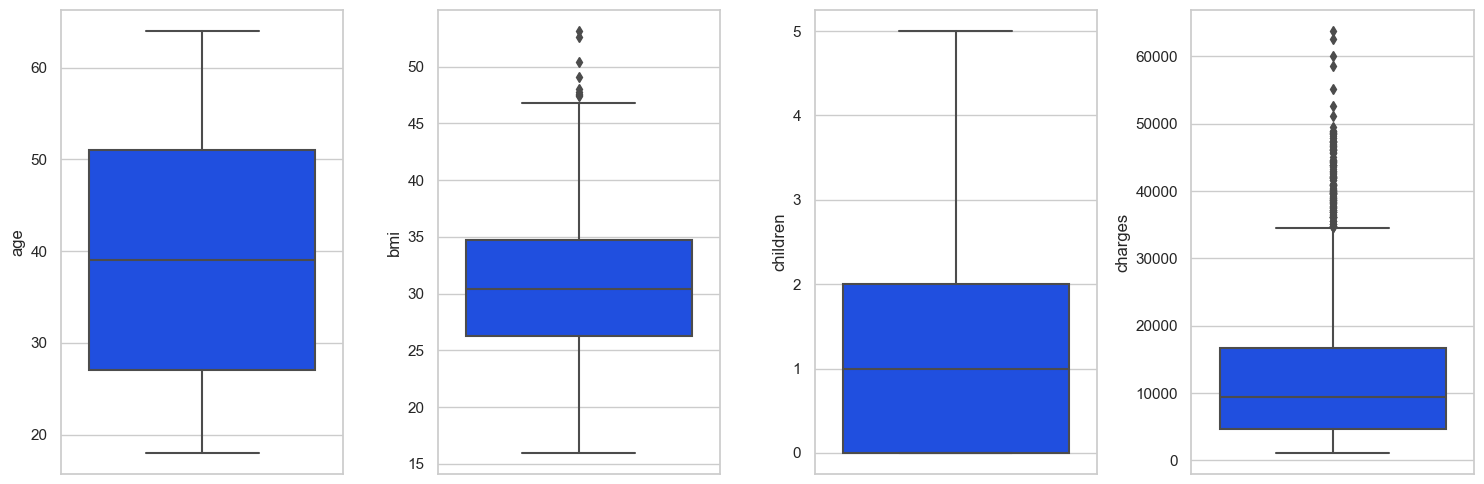

In [16]:
#Boxplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

#### KDEplot

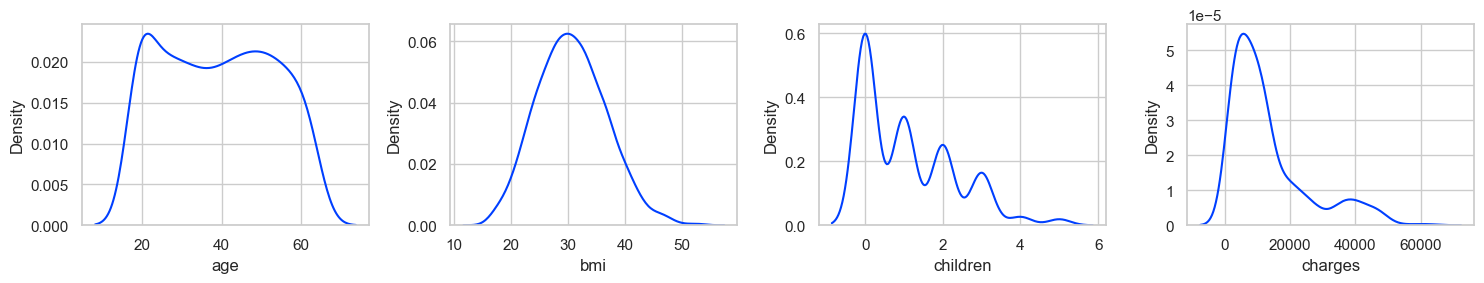

In [17]:
#KDEplot Visual
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

#### Histplot

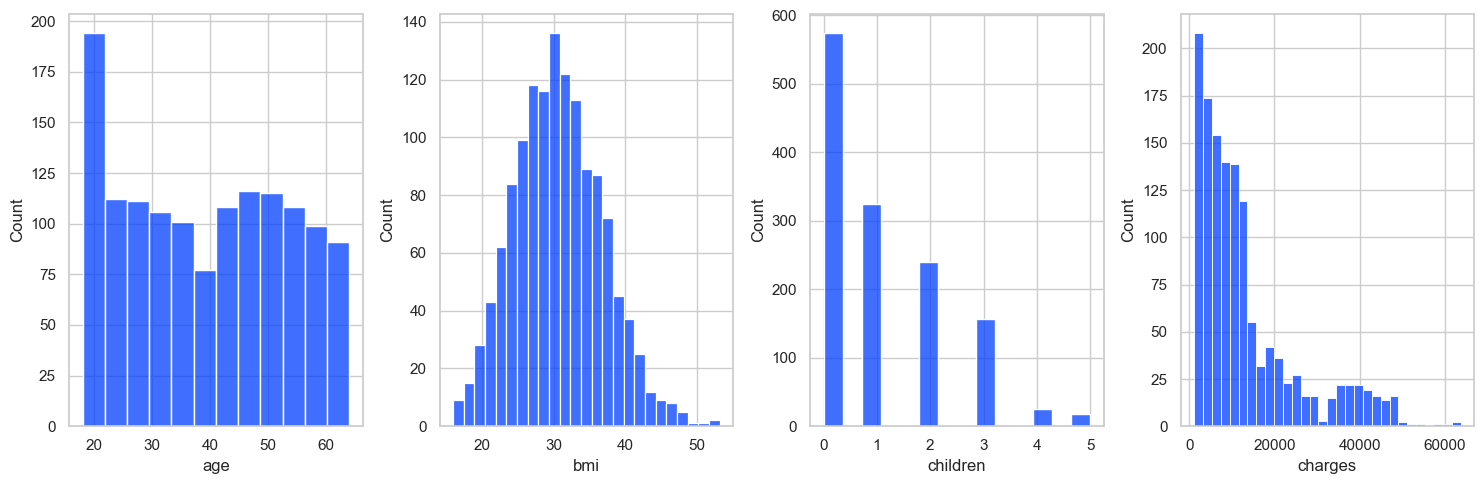

In [18]:
#Histplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

#### Countplot

ValueError: could not convert string to float: 'female'

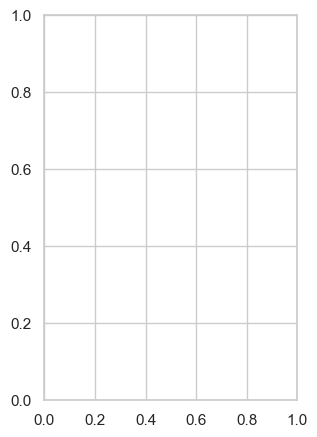

In [19]:
#Countplot Visual
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()

### Multivariate Analysis

#### Heatmap

In [ ]:
#Heatmap Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### Pairplot

In [ ]:
#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')

#### Scatterplot

In [ ]:
#Scatterplor Visualization
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

In [ ]:
#Scatterplor Visualization
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

#### Barplot

In [ ]:
#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

In [ ]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

In [ ]:
#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

In [ ]:
#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [ ]:
#Count Smoker with Sex Hue
smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

In [ ]:
#Barplot Visualization
sns.barplot(x = smoker_sex['sex'], y = smoker_sex['count'], hue = smoker_sex['smoker'], data = smoker_sex)

In [ ]:
#Barplot with Hue Sex
sns.barplot(x = df['children'], y = df['charges'], hue = df['sex'], data = df)

In [ ]:
#Barplot with Hue Smoker
sns.barplot(x = df['children'], y = df['charges'], hue = df['smoker'], data = df)

In [ ]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

In [ ]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [ ]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status 

In [ ]:
#Insurance Cost based on Weight_Status and smoker
smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

In [ ]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status_charges)

In [ ]:
#Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

In [ ]:
#Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

In [ ]:
#Average Charges Barplot
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

Person who smoke have to pay more cost for insurance, obese person who smoke have the highest medical cost.

# Data Processing

## Missing Value

In [ ]:
#Check Missing Value
df.isna().sum()

There are no missing value

## Duplicate Value

In [ ]:
#Check Duplicate Value
df.duplicated().sum()

In [ ]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

## dfori

In [ ]:
#Copy DataFrame
dfori = df.copy()

### Feature Transformation

In [ ]:
#Ordinal Encoding
dfori['smoker'] = dfori['smoker'].replace({'yes' : 0, 'no' : 1})

#One Hot Encoding
sex_ori = pd.get_dummies(dfori['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfori['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfori['weight_status'], prefix = 'status')

#Concat Feature Encoding
dfori = pd.concat([dfori, sex_ori], axis=1)
dfori = pd.concat([dfori, region_ori], axis=1)
dfori = pd.concat([dfori, status_ori], axis=1)

In [ ]:
#Drop Encoded Feature
dfori = dfori.drop(columns = ['sex', 'region', 'weight_status'])

#Check df
dfori

In [ ]:
dfori.info()

In [ ]:
#Grouping Features for Normalization
norm_ori = dfori.drop(columns = ['charges']).columns
print(norm_ori)

In [ ]:
#Normalization Features
for i in range(len(norm_ori)):
    dfori[norm_ori[i]] = MinMaxScaler().fit_transform(dfori[norm_ori[i]].values.reshape(len(dfori), 1))

In [ ]:
#Check dfori
dfori

# Modeling

In [ ]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [ ]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [ ]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

## Model dfori

In [ ]:
#Separating Target & Features
x1 = dfori.drop(columns = ['charges']) #Features
y1 = dfori['charges'] #Target

In [ ]:
#Splitting Train & Test 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [ ]:
print(dfori['charges'])

In [ ]:
#Modeling
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
}

for model_name, model in models.items():
    model.fit(xtrain1, ytrain1)
    prediction1 = model.predict(xtest1)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1), '\n')

In [ ]:
prediction1

## Tuning Hyperparameter

In [ ]:
LinearRegression().get_params().keys()

In [ ]:
#List Hyperparameters
hyperparameters = dict(
                       fit_intercept = [True, False],
                       n_jobs = [-1, 0, 1, 2],
                       normalize = [True, False],
                       copy_X = [True, False]
                      )

#Initiation
LR1 = LinearRegression()
LR_tuned1 = RandomizedSearchCV(LR1, hyperparameters, cv=5, random_state=42, scoring='r2')
LR_tuned1.fit(xtrain1, ytrain1)

# Predict & Evaluation
prediction1 = LR_tuned1.predict(xtest1)
evaluation(LR_tuned1, prediction1, xtrain1, ytrain1, xtest1, ytest1)

In [ ]:
#Check Best Hyperparameter
best_hyperparameter(LR_tuned1.best_estimator_, hyperparameters)

In [ ]:
alpha = [0.01, 0.1, 1, 2, 5, 10, 100]
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

Ridge1 = Ridge()
Ridge_tuned = RandomizedSearchCV(Ridge1, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
hyper_ridge = Ridge_tuned.fit(xtrain1, ytrain1)

In [ ]:
prediction1 = hyper_ridge.predict(xtest1)
evaluation(hyper_ridge, prediction1, xtrain1, ytrain1, xtest1, ytest1)

In [ ]:
#Check Best Hyperparameter
best_hyperparameter(hyper_ridge.best_estimator_, hyperparameters)

# Conclusion

**Exploratory Data Analysis**
- most people are a non smokers & obese
- feature sex, region has an almost balanced amount
- person who smoke & have a higher BMI, has higher medical charges
- older people who smoke have more expensive charges
- an obese person who smokes have higher charges

**Modeling** <br>
Based on the predictive modeling, Linear Regression algorithm has the best score compared to the others, with MAE Score 4305.20, RMSE Score 6209.88, & R2 Score 0.77. Linear Regression algorithm is fit based on the train & test accuracy.